In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
# def datasets(df):
#     df = pd.read_csv(df)
#     return df

def load_dataset(file_path: str) -> pd.DataFrame:
    """
    Loads a dataset from a CSV file.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded dataset.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"File is empty: {file_path}")
        return None
    except pd.errors.ParserError as e:
        print(f"Error parsing file: {file_path}. {e}")
        return None

In [4]:
# Define the path to the weather dataset
weather_dataset= "weatherAUS.csv"
# Load the dataset 
wd_df = load_dataset(weather_dataset)
# print(wd_df.head())
wd_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Logistics Regression on Weather CSV

### Exploratory Data Analysis

In [5]:
# View the Dataframe
wd_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
# Dataframe shape (rows, columns)
wd_df.shape

(145460, 23)

In [6]:
# To get full information about the dataframe
wd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
for var in wd_df:
    num_unique_values = wd_df[var].nunique()
    print(f"{var} contains {num_unique_values} unique values")

Date contains 3436 unique values
Location contains 49 unique values
MinTemp contains 389 unique values
MaxTemp contains 505 unique values
Rainfall contains 681 unique values
Evaporation contains 358 unique values
Sunshine contains 145 unique values
WindGustDir contains 16 unique values
WindGustSpeed contains 67 unique values
WindDir9am contains 16 unique values
WindDir3pm contains 16 unique values
WindSpeed9am contains 43 unique values
WindSpeed3pm contains 44 unique values
Humidity9am contains 101 unique values
Humidity3pm contains 101 unique values
Pressure9am contains 546 unique values
Pressure3pm contains 549 unique values
Cloud9am contains 10 unique values
Cloud3pm contains 10 unique values
Temp9am contains 441 unique values
Temp3pm contains 502 unique values
RainToday contains 2 unique values
RainTomorrow contains 2 unique values


In [7]:
# Create a variable to view the column name
column_names = wd_df.columns.tolist()
# Print the variable
print(column_names)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


#### Types of variables
In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables.

In [8]:
# Categorical Variables
categorical_data = [var for var in wd_df.columns if wd_df[var].dtype == "O"]  # or wd_df[var].dtype == "object" or wd_df[var].dtype.name == 'category'
print(f"There are {len(categorical_data)} categorical variables")
print(f"The categorical variables are: {categorical_data}")

There are 7 categorical variables
The categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# view the Categorical Variables
# wd_df_cat = wd_df[categorical_data]
# wd_df_cat.head()

categorical_df = wd_df.select_dtypes(include=["object"])
categorical_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


#### Summary of the Categorical Variables
- There is a date variable, it is denoted by the `Date` column
- There are 6 categorical variable, These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, `RainTomorrow`
- There are 2 binary categorical variable, These are the `RainToday`, `RainTomorrow`
- The `RainTomorrow` variable is the target variable

In [10]:
# Check for missing values in the categorical variables
wd_df[categorical_data].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [11]:
# check the categorical variables with missing values only
missing_cat = [ var for var in categorical_data if wd_df[var].isnull().sum().any()]
print(wd_df[missing_cat].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [12]:
# Check frequency of categorical variables
for var in categorical_data:
    freq = wd_df[var].value_counts()
    print(f"Frequency of {var}:")
    print(freq)
    print()  # Empty line for better readability

Frequency of Date:
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

Frequency of Location:
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthA

In [13]:
# # check frequency distribution of categorical variables
# for var in categorical_data:
#     print(wd_df[var].value_counts()/np.float64(len(wd_df)))

# Check frequency distribution of categorical variables
for var in categorical_data:
    freq_dist = wd_df[var].value_counts(normalize=True)
    print(f"Frequency distribution of {var}:")
    print(freq_dist)
    print()

Frequency distribution of Date:
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64

Frequency distribution of Location:
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892

##### Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [14]:
# Check the cardinality of categorical variables
for var in categorical_data:
    num_unique_values = wd_df[var].nunique()
    print(f"{var} contains {num_unique_values} unique values")

Date contains 3436 unique values
Location contains 49 unique values
WindGustDir contains 16 unique values
WindDir9am contains 16 unique values
WindDir3pm contains 16 unique values
RainToday contains 2 unique values
RainTomorrow contains 2 unique values


We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variable
We will carry out feature engineering on the `Date` variable and split it into `Year`, `Month` and `Day` Variables.

#### Feature Engineering of the Date Variable

In [15]:
# checking the dtype of the Date Variable
wd_df['Date'].dtype

dtype('O')

We can see that the data type of `Date` variable is object. I will parse the date currently coded as object into datetime format.

In [16]:
# parse the Date variable, currently a string into a date format
wd_df['Date'] = pd.to_datetime(wd_df['Date'])

# Extract Year, Month, Day variable
wd_df['Year'], wd_df['Month'], wd_df['Day'] = wd_df['Date'].dt.year, wd_df['Date'].dt.month, wd_df['Date'].dt.day


In [17]:
wd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [18]:
wd_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [19]:
# Let's drop the Date column as we won't be needing it again
wd_df.drop(columns=['Date'])
wd_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


#### Explore Categorical Variables
Now, I will explore the categorical variables one by one.

In [20]:
# find categorical variables

categorical = [var for var in wd_df.columns if wd_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

# you would notice that the Date column is no more available

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### Explore the `Location` Variable

In [21]:
# check the number of labels in the Location Variable

print(f"Location contains {len(wd_df['Location'].unique())} labels")

Location contains 49 labels


In [22]:
# check the labels
print(wd_df['Location'].unique().tolist())

['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


In [23]:
# check frequency distribution of the labels in Location Variable
location_counts = wd_df['Location'].value_counts()
print("Location Unique Counts")
print(location_counts)

Location Unique Counts
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Wi

In [24]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method
"""
This is a pandas function that performs One Hot Encoding (OHE) on a categorical variable. \
OHE is a technique to convert categorical variables into numerical variables that can be used in machine learning models.
"""
location_one_hot = pd.get_dummies(wd_df['Location'], drop_first=True).astype(int)
location_one_hot.head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explore the `WindGustDir` Variable

In [25]:
# check the number of labels in the WindGustDir Variable
print(f"Location contains {len(wd_df['WindGustDir'].unique())} labels")

Location contains 17 labels


In [26]:
# check the labels
print(wd_df['WindGustDir'].unique().tolist())

['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']


In [27]:
# check frequency distribution of the labels in WindGustDir Variable
WindGustDir_count = wd_df['WindGustDir'].value_counts()
# WindGustDir_count.plot(kind='bar', figsize=(10, 5), title='Frequency')
print("WindGustDir Count")
print(WindGustDir_count)

WindGustDir Count
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


In [28]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

WindGustDir_one_hot = pd.get_dummies(wd_df['WindGustDir'], drop_first=True).astype(int)
WindGustDir_one_hot.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Explore the `WindDir9am` Variable

In [29]:
# check the number of labels in the WindDir9am Variable

print(f"Location contains {len(wd_df['WindDir9am'].unique())} labels")

Location contains 17 labels


In [30]:
# check the labels
print(wd_df['WindDir9am'].unique().tolist())

['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N', 'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']


In [31]:
# check frequency distribution of the labels in WindDir9am Variable
WindDir9am_count = wd_df['WindDir9am'].value_counts()
print('WindGustDir Counts')
print(WindGustDir_count)

WindGustDir Counts
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64


In [32]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

WindDir9am_one_hot = pd.get_dummies(wd_df['WindDir9am'], drop_first=True).astype(int)
WindDir9am_one_hot.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Explore the `WindDir3pm` Variable

In [33]:
# check the number of labels in the WindDir3pm Variable

print(f"Location contains {len(wd_df['WindDir3pm'].unique())} labels")

Location contains 17 labels


In [34]:
# check the labels
print(wd_df['WindDir3pm'].unique().tolist())

['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE']


In [35]:
# check frequency distribution of the labels in WindDir3pm Variable
WndDir3pm_count = wd_df['WindDir3pm'].value_counts()
print("WindDir9am Count")
print(WindDir9am_count)

WindDir9am Count
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64


In [36]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

WindDir3pm_one_hot = pd.get_dummies(wd_df['WindDir3pm'], drop_first=True).astype(int)
WindDir3pm_one_hot.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Explore the `RainToday` Variable

In [37]:
# check the number of labels in the RainToday Variable

print(f"Location contains {len(wd_df['RainToday'].unique())} labels")

Location contains 3 labels


In [38]:
# check the labels
wd_df['RainToday'].unique().tolist()

['No', 'Yes', nan]

In [39]:
# check frequency distribution of the labels in RainToday Variable
raintoday_count = wd_df['RainToday'].value_counts(dropna=False)
print("Rain Today Count")
print(raintoday_count)

Rain Today Count
No     110319
Yes     31880
NaN      3261
Name: RainToday, dtype: int64


In [40]:
# replace the NaN values with the most occuring value(mode)
mode_value = wd_df["RainToday"].mode().iloc[0]
wd_df["RainToday"] = wd_df["RainToday"].fillna(mode_value)

In [41]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

RainToday_one_hot = pd.get_dummies(wd_df['RainToday'], 
                                drop_first=True, 
                                ).astype(int)
print(RainToday_one_hot)

        Yes
0         0
1         0
2         0
3         0
4         0
...     ...
145455    0
145456    0
145457    0
145458    0
145459    0

[145460 rows x 1 columns]


In [42]:
RainToday_one_hot.sum(axis=0)

Yes    31880
dtype: int64

#### Explore the `RainTomorrow` Variable

In [43]:
# check the number of labels in the RainTomorrow Variable

print(f"Location contains {len(wd_df['RainTomorrow'].unique())} labels")

Location contains 3 labels


In [44]:
# check the labels
wd_df['RainTomorrow'].unique().tolist()

['No', 'Yes', nan]

In [45]:
# check frequency distribution of the labels in RainToday Variable
wd_df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

In [46]:
# replace the NaN values with the most occuring value(mode)
mode_value = wd_df["RainTomorrow"].mode().iloc[0]
wd_df["RainTomorrow"] = wd_df["RainTomorrow"].fillna(mode_value)

In [47]:
wd_df['RainTomorrow'].isnull().sum()

0

In [48]:
wd_df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

### Exploring the Numerical Variables

In [49]:
# find the numerical variables

# numerical_data = [var for var in wd_df.columns if wd_df[var].dtype != 'O']
numerical_variables = [var for var in wd_df.columns if wd_df[var].dtype.kind in 'bifc']
# bifc = boolean, integer, float, complex
print(f"Numerical variables count: {len(numerical_variables)}")
print(f"Numerical variables: {numerical_variables}")

Numerical variables count: 19
Numerical variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [50]:
# numerical_data.head()
wd_df[numerical_variables].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


#### Summary of the numerical variables
- There are 19 numerical variables
- The numerical variables are: `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`, `Temp3pm`, `Year`, `Month`, `Day`
- All numerical variable are continous type

### Exploring problems in the Numerical Variables


#### Checking for missing values

In [51]:
# check missing values in numerical values
wd_df[numerical_variables].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

#### Checking for outliers

In [52]:
# view summary statistics in the variables
summary_stats = wd_df[numerical_variables].describe().round(2)
summary_stats = summary_stats.T
summary_stats

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.19,6.40,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.22,7.12,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.36,8.48,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.47,4.19,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.61,3.79,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.04,13.61,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.04,8.92,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.66,8.81,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.88,19.03,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.54,20.80,0.0,37.0,52.0,66.0,100.0


On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

In [80]:
# # Draw a boxplot to visualise all four(4) of the columns

# plt.figure(figsize=(15,10))

# plt.subplot(2,2,1)
# fig = wd_df.boxplot(column="Rainfall")
# fig.set_title("")
# fig.set_ylabel("Rainfall")

# plt.subplot(2,2,2)
# fig = wd_df.boxplot(column='Evaporation')
# fig.set_title("")
# fig.set_ylabel("Evaporation")

# plt.subplot(2,2,3)
# fig = wd_df.boxplot(column='WindSpeed9am')
# fig.set_title("")
# fig.set_ylabel("WindSpeed9am")

# plt.subplot(2,2,4)
# fig = wd_df.boxplot(column='WindSpeed3pm')
# fig.set_title("")
# fig.set_ylabel("WindSpeed9pm")

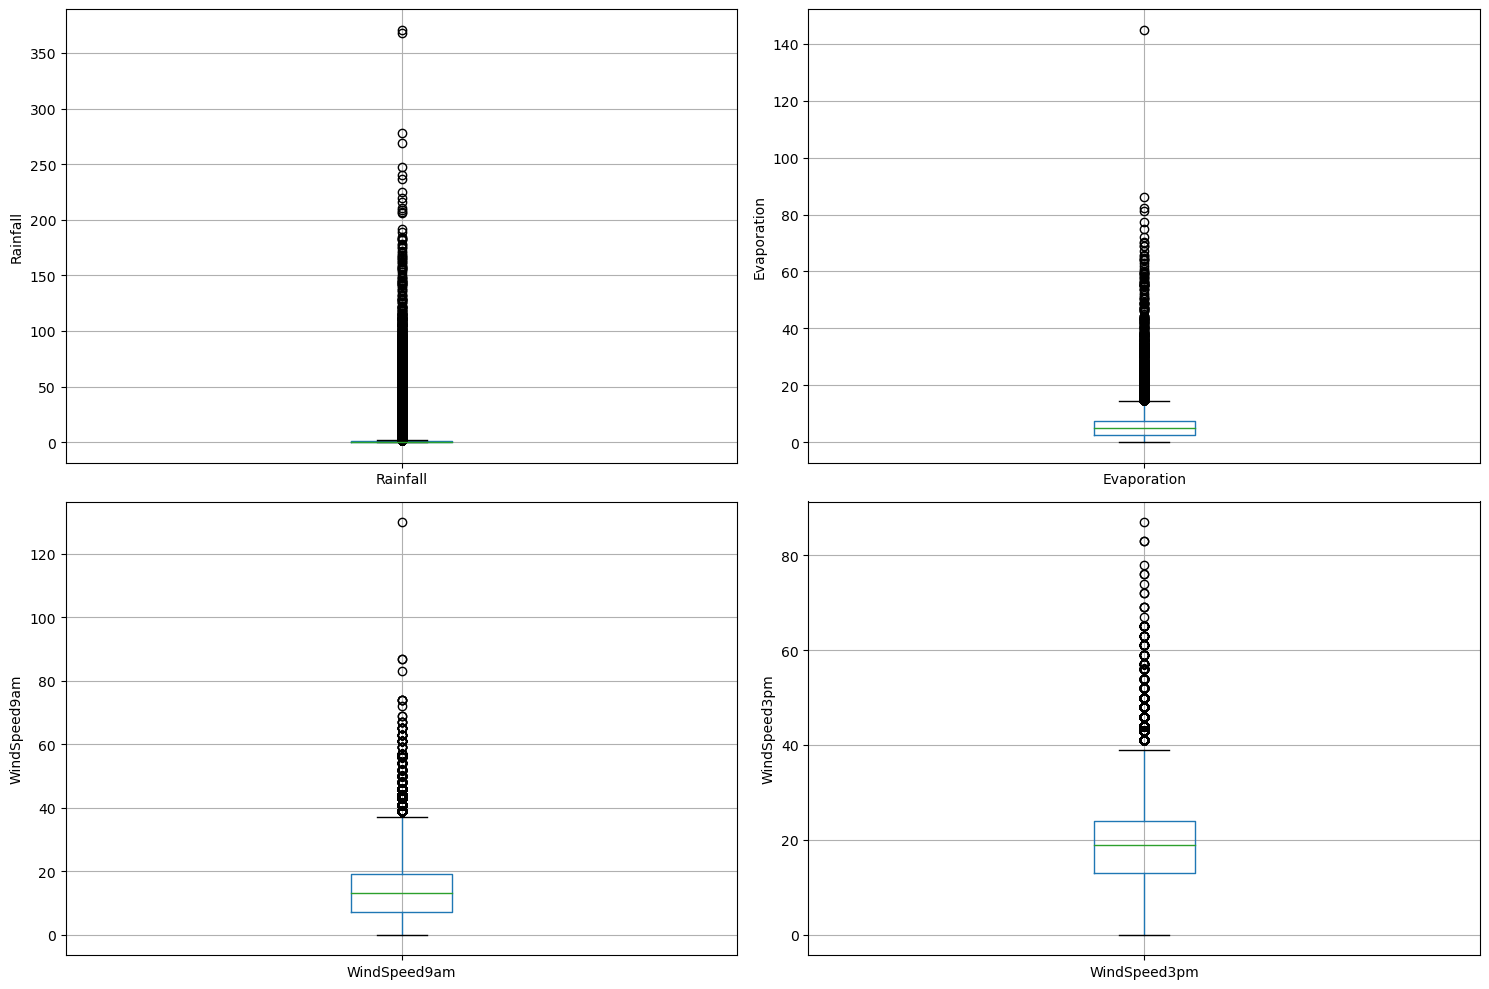

In [53]:
# Draw a boxplot to visualize all four columns

# plt.subplots to create a single figure with multiple subplots.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# defined the columns, titles, and ylabels as lists, which makes it easier to loop over them.
columns = ["Rainfall", "Evaporation", "WindSpeed9am", "WindSpeed3pm"]
titles = ["", "", "", ""]
ylabels = ["Rainfall", "Evaporation", "WindSpeed9am", "WindSpeed3pm"]

for i, (column, title, ylabel) in enumerate(zip(columns, titles, ylabels)):
    # to access the correct subplot in the 2x2 grid
    ax = axs[i // 2, i % 2]
    wd_df.boxplot(column=column, ax=ax)
    ax.set_title(title)
    ax.set_ylabel(ylabel)

# ensure that the subplots fit well in the figure.
plt.tight_layout()
# display the plot.
plt.show()

`The above boxplots confirm that there are lot of outliers in these variables.`

#### Boxplot to visualize the remaining variables and compare
MinTemp, MaxTemp, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, Year, Month, Day

In [82]:
# def boxplot(dataset, column):
#     plt.figure(figsize=(7.5,5))

#     plt.subplot(2,2,1)
#     fig = dataset.boxplot(column=column)
#     fig.set_title("")
#     fig.set_ylabel(column)
    
# boxplot(wd_df, "MinTemp")
# boxplot(wd_df, "MaxTemp")
# boxplot(wd_df, "Sunshine")
# boxplot(wd_df, "WindGustSpeed")
# boxplot(wd_df, "Humidity9am")
# boxplot(wd_df, "Humidity3pm")
# boxplot(wd_df, "Pressure9am")
# boxplot(wd_df, "Pressure3pm")
# boxplot(wd_df, "Cloud9am")
# boxplot(wd_df, "Cloud3pm")
# boxplot(wd_df, "Temp9am")
# boxplot(wd_df, "Temp3pm")
# boxplot(wd_df, "Year")
# boxplot(wd_df, "Month")
# boxplot(wd_df, "Day")

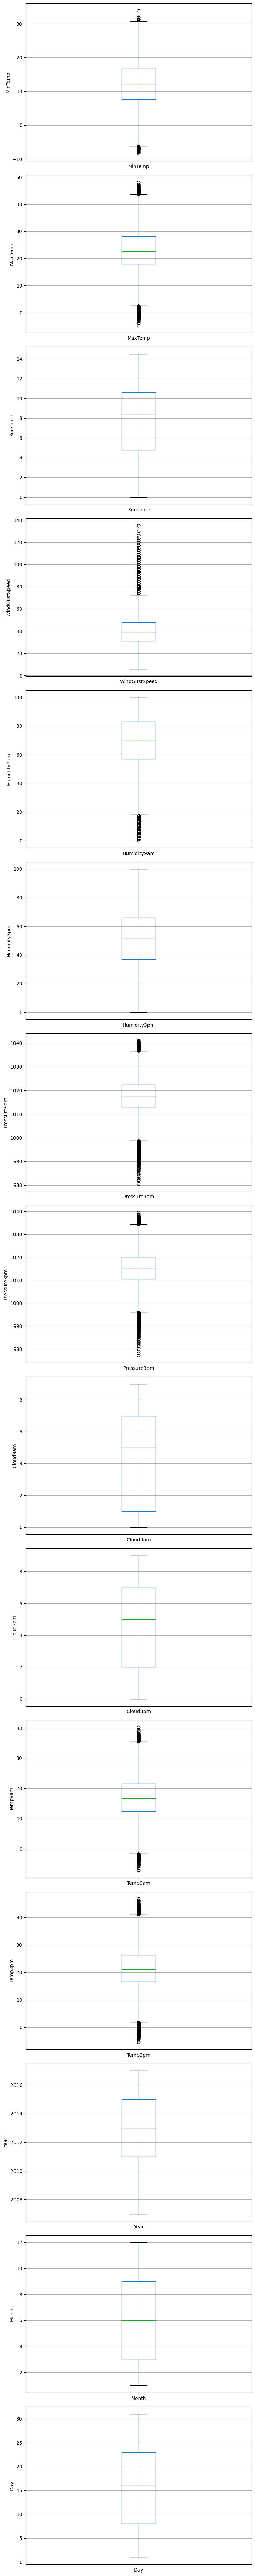

In [54]:
def create_boxplots(dataset, columns):
    """
    Creates boxplots for the specified columns in the dataset.

    Args:
        dataset (pandas.DataFrame): The dataset to plot from.
        columns (list[str]): The columns to plot.

    Returns:
        None
    """
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(7.5, 5 * len(columns)))
    for column, ax in zip(columns, axes):
        dataset.boxplot(column=column, ax=ax)
        ax.set_title("")
        ax.set_ylabel(column)
    plt.tight_layout()
    plt.show()

# Define the columns to plot
columns_to_plot = [
    "MinTemp",
    "MaxTemp",
    "Sunshine",
    "WindGustSpeed",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Cloud9am",
    "Cloud3pm",
    "Temp9am",
    "Temp3pm",
    "Year",
    "Month",
    "Day"
]

# Create boxplots for each column
create_boxplots(wd_df, columns_to_plot)

#### Check the distribution of variables
Now, I will plot the histograms to check distributions to find out if they are `normal or skewed`. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find `IQR (Interquantile range)`.

In [84]:
# # Plot a Histogram to check the Distribution
# # Plot against RainTomorrow

# plt.figure(figsize=(15, 10))

# plt.subplot(2, 2, 1)
# fig = wd_df['Rainfall'].hist(bins=10)
# fig.set_xlabel('Rainfall')
# fig.set_ylabel('RainTomorrow')

# plt.subplot(2, 2, 2)
# fig = wd_df['Evaporation'].hist(bins=10)
# fig.set_xlabel('Evaporation')
# fig.set_ylabel('RainTomorrow')

# plt.subplot(2,2,3)
# fig = wd_df['WindSpeed9am'].hist(bins=10)
# fig.set_xlabel('WindSpeed9am')
# fig.set_ylabel('RainTomorrow')

# plt.subplot(2, 2, 4)
# fig = wd_df['WindSpeed3pm'].hist(bins=10)
# fig.set_xlabel('WindSpeed3pm')
# fig.set_ylabel('RainTomorrow')

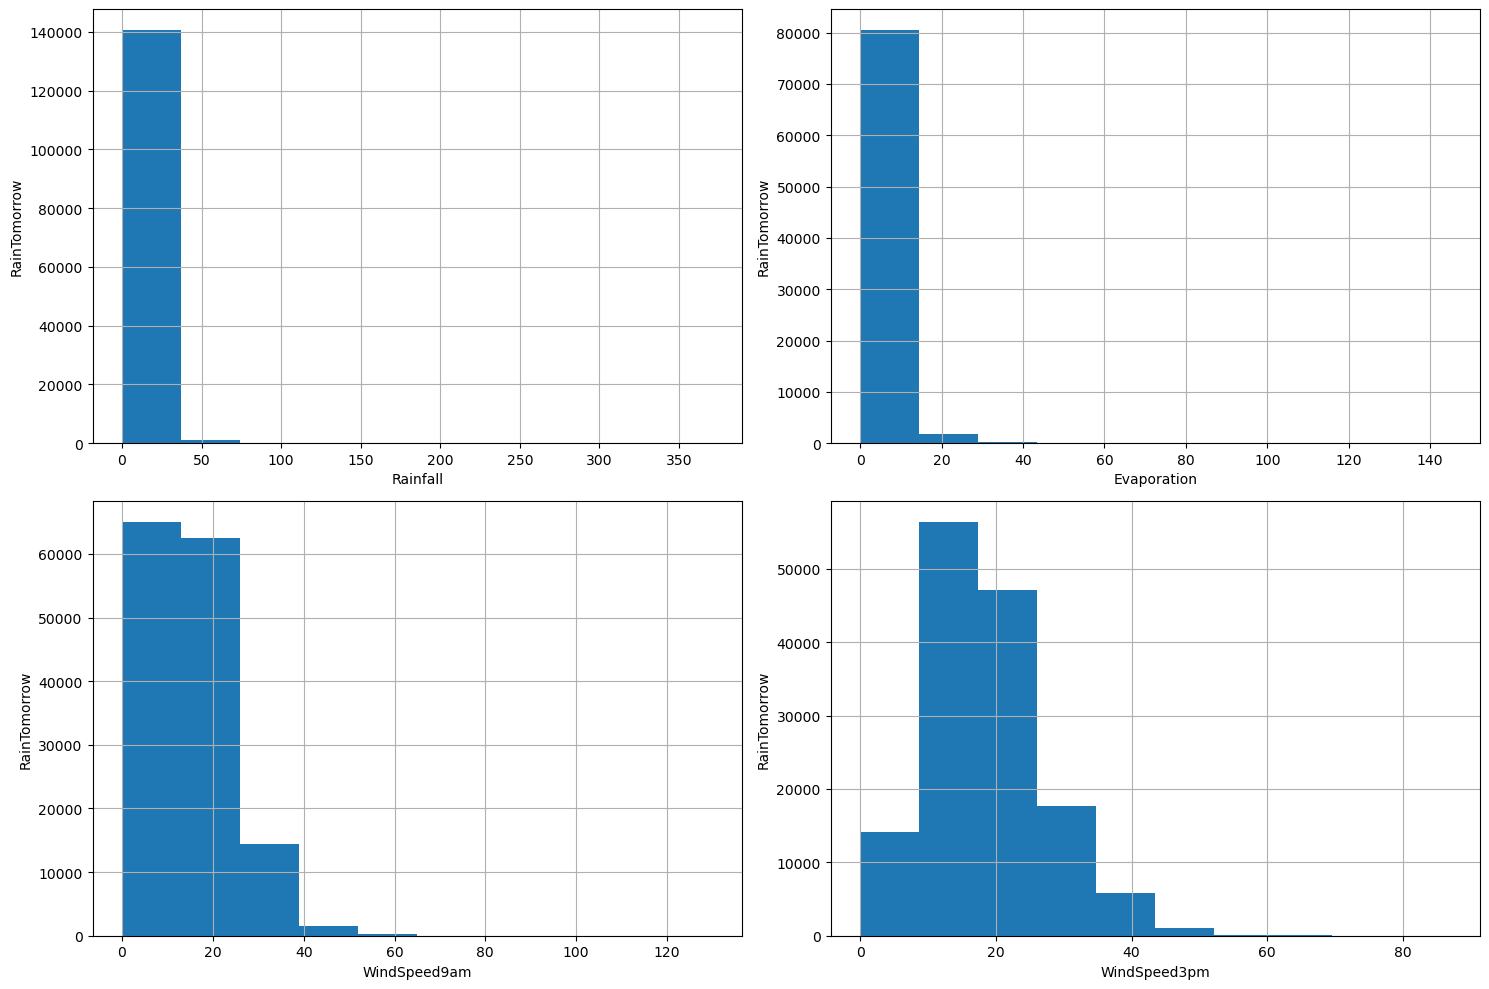

In [55]:
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Define the columns to plot
columns_to_plot = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

# Iterate over the columns and plot
for i, column in enumerate(columns_to_plot):
    ax = axs[i // 2, i % 2]
    wd_df[column].hist(bins=10, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('RainTomorrow')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

`We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.`

#### Before we continue, let's compare the distribution of other columns to see the differences

In [88]:
# # MinTemp, MaxTemp, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, Year, Month, Day
# def distribution(dataset, column):
#     plt.figure(figsize=(7.5, 5))

#     plt.subplot(2, 2, 1)
#     fig = dataset[column].hist(bins=10)
#     fig.set_xlabel(column)
#     fig.set_ylabel('RainTomorrow')

# distribution(wd_df, "MinTemp")
# distribution(wd_df, "MaxTemp")
# distribution(wd_df, "Sunshine")
# distribution(wd_df, "WindGustSpeed")
# distribution(wd_df, "Humidity9am")
# distribution(wd_df, "Humidity3pm")
# distribution(wd_df, "Pressure9am")
# distribution(wd_df, "Pressure3pm")
# distribution(wd_df, "Cloud9am")
# distribution(wd_df, "Cloud3pm")
# distribution(wd_df, "Temp9am")
# distribution(wd_df, "Temp3pm")
# distribution(wd_df, "Year")
# distribution(wd_df, "Month")
# distribution(wd_df, "Day")

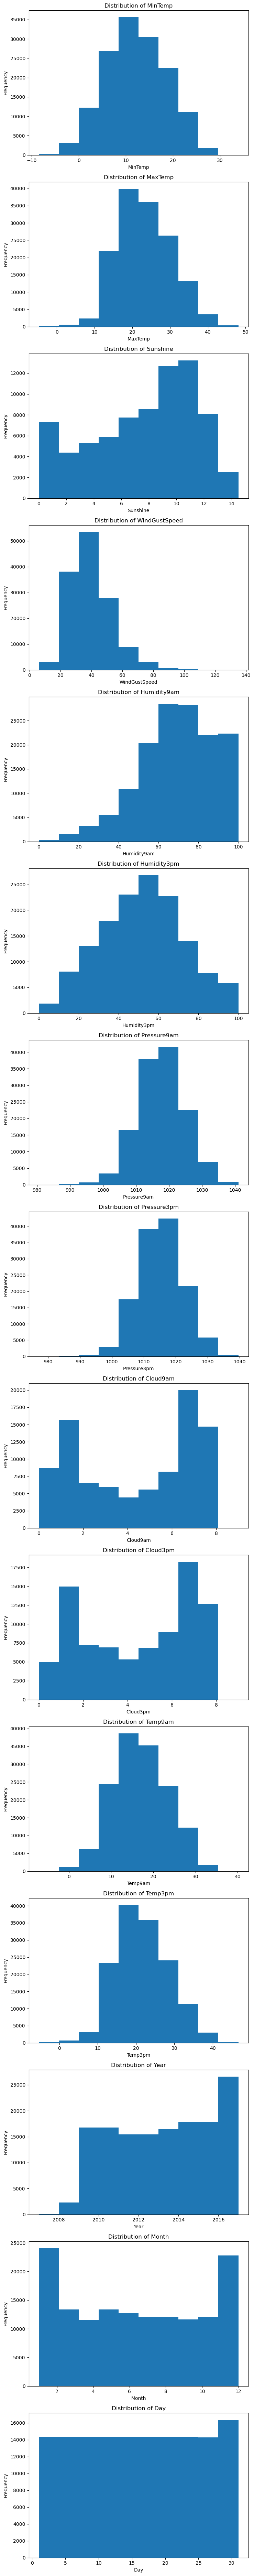

In [57]:
def plot_distribution(dataset: pd.DataFrame, columns: list[str], bins: int = 10) -> None:
    """
    Plot histograms for each column in the dataset.

    Parameters:
    - dataset (pandas.DataFrame): The dataset to plot.
    - columns (list of str): The columns to plot.
    - bins (int): The number of bins for the histogram. Defaults to 10.
    """
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(7.5, 5*len(columns)))
    
    for ax, column in zip(axes, columns):
        ax.hist(dataset[column], bins=bins)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

columns_to_plot: list[str] = [
    "MinTemp", "MaxTemp", "Sunshine", "WindGustSpeed", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm",
    "Year", "Month", "Day"
]

plot_distribution(wd_df, columns_to_plot)

#### Finding the outlier for the four variables

In [58]:
def calculate_outlier_boundaries(df: pd.DataFrame, columns: str) -> None:
    """
    Calculate the IQR and outlier boundaries for a given column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to calculate outliers for.
    - column (str): The column to calculate outliers for.
    """
    for column in columns:
        IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
        lower_boundary = df[column].quantile(0.25) - (IQR * 3)
        upper_boundary = df[column].quantile(0.75) + (IQR * 3)
        print(f"{column.capitalize()} outliers are values < {lower_boundary} or > {upper_boundary}")

columns =["Rainfall", "Evaporation", "WindSpeed9am", "WindSpeed3pm"]
calculate_outlier_boundaries(wd_df, columns)

Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
Windspeed9am outliers are values < -29.0 or > 55.0
Windspeed3pm outliers are values < -20.0 or > 57.0


##### Rainfall

For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2

##### Evaporation

For `Evaporation`, the min and max values are 0.0 and 145.0, therefore the outliers are >21.8

##### WindSpeed9am

For `WindSpeed9am`, the min and max values are 0.0 and 130.0, therefore the outliers are > 55.0

#### WindSpeed3pm

For the `WindSpeed3pm`, the min and max values are 0.0 and 57.0, therefore the outliers are > 57.0

#### A helper function to check others

In [59]:
columns = ("MinTemp", "MaxTemp", "Sunshine", "WindGustSpeed", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "Year", "Month", "Day")
calculate_outlier_boundaries(wd_df, columns)

Mintemp outliers are values < -20.299999999999997 or > 44.8
Maxtemp outliers are values < -13.000000000000004 or > 59.1
Sunshine outliers are values < -12.599999999999998 or > 28.0
Windgustspeed outliers are values < -20.0 or > 99.0
Humidity9am outliers are values < -21.0 or > 161.0
Humidity3pm outliers are values < -50.0 or > 153.0
Pressure9am outliers are values < 984.4 or > 1050.9
Pressure3pm outliers are values < 981.5999999999999 or > 1048.8000000000002
Cloud9am outliers are values < -17.0 or > 25.0
Cloud3pm outliers are values < -13.0 or > 22.0
Temp9am outliers are values < -15.600000000000001 or > 49.5
Temp3pm outliers are values < -12.79999999999999 or > 55.79999999999999
Year outliers are values < 1999.0 or > 2027.0
Month outliers are values < -15.0 or > 27.0
Day outliers are values < -37.0 or > 68.0


## Declare Feature Inputs and Target Variable

In [ ]:
X = wd_df.drop(['RainTomorrow'], axis=1)
y = wd_df['RainTomorrow']

## Carrying Out a Train, Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(116368, 24) (29092, 24)
(116368,) (29092,)


## Feature Engineering of Training and Testing datasets

#### X_train

In [ ]:
# check the x_train types

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [ ]:
# Display the categorical and Numerical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

print(f"These are the categorical variables: {categorical}")
print(f"These are the numerical variables: {numerical}")

These are the categorical variables: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
These are the numerical variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


#### Engineering missing values in the Numerical values

In [ ]:
X_train[numerical].isnull().sum()

MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustSpeed     8202
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustSpeed     2061
WindSpeed9am       359
WindSpeed3pm       605
Humidity9am        537
Humidity3pm        891
Pressure9am       3004
Pressure3pm       2986
Cloud9am         11131
Cloud3pm         11810
Temp9am            362
Temp3pm            712
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    x_mean = X_train[col].isnull().mean()
    if x_mean>0:
        print(col, round(x_mean,4))

MinTemp 0.0101
MaxTemp 0.0086
Rainfall 0.0224
Evaporation 0.4325
Sunshine 0.4807
WindGustSpeed 0.0705
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0182
Humidity3pm 0.0311
Pressure9am 0.1036
Pressure3pm 0.1035
Cloud9am 0.3846
Cloud3pm 0.4086
Temp9am 0.0121
Temp3pm 0.0249


In [ ]:
# print percentage of missing values in the numerical variables in testing set

for col in numerical:
    x_test_mean = X_test[col].isnull().mean()
    if x_test_mean>0:
        print(col, round(x_test_mean,4))

MinTemp 0.0106
MaxTemp 0.009
Rainfall 0.0226
Evaporation 0.4283
Sunshine 0.4776
WindGustSpeed 0.0708
WindSpeed9am 0.0123
WindSpeed3pm 0.0208
Humidity9am 0.0185
Humidity3pm 0.0306
Pressure9am 0.1033
Pressure3pm 0.1026
Cloud9am 0.3826
Cloud3pm 0.406
Temp9am 0.0124
Temp3pm 0.0245


#### Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are` outlier`s in the dataset, we should use` median imputatio`n. So, I will use median imputation because median imputation is robust to outliers


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [ ]:
# impute missing values of X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

# print(X_train.isnull().sum())
# print(X_test.isnull().sum())

In [ ]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

`Now, we can see that there are no missing values in the numerical columns of training and test set.`

#### Engineering missing values in Categorical Values

In [ ]:
# X_train[categorical].isnull().sum()
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.070896
WindDir9am     0.072434
WindDir3pm     0.029192
RainToday      0.022377
dtype: float64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    cat_mean = X_train[col].isnull().mean()
    if cat_mean > 0:
        print(col, round(cat_mean, 4))

WindGustDir 0.0709
WindDir9am 0.0724
WindDir3pm 0.0292
RainToday 0.0224


In [ ]:
# input missing categorical values with most frequent values
for df2 in [X_train, X_test]:
    for col in categorical:
        col_mode = X_train[col].mode()[0]
        df2[col].fillna(col_mode, inplace=True)

In [ ]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

`As a final check, I will check for missing values in X_train and X_test.`

In [ ]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

#### Engineering outliers in numerical variables
We have seen that the` Rainfal` ,` Evaporatio` ,` WindSpeed9a`m and` WindSpeed3p`m columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.195085,23.214229,2.325638,5.177513,7.991327,39.963031,14.039427,18.670597,68.927927,51.564992,1017.635219,1015.241642,4.662167,4.707918,16.988399,21.669685,2012.775308,6.402396,15.712447
std,6.367295,7.087178,8.448650,3.177739,2.755849,13.144589,8.865300,8.725620,18.842219,20.458995,6.740623,6.677415,2.281875,2.107738,6.449257,6.850912,2.540573,3.431500,8.792577
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
def max_value(df3, variable, top):
    return np.where(df3[variable] > top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

print(X_train['Rainfall'].max(), X_test['Rainfall'].max())
print(X_train['Evaporation'].max(), X_test['Evaporation'].max())
print(X_train['WindSpeed9am'].max(), X_test['WindSpeed9am'].max())
print(X_train['WindSpeed3pm'].max(), X_test['WindSpeed3pm'].max())

3.2 3.2
21.8 21.8
55.0 55.0
57.0 57.0


In [ ]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.195085,23.214229,0.668965,5.139926,7.991327,39.963031,14.034528,18.666609,68.927927,51.564992,1017.635219,1015.241642,4.662167,4.707918,16.988399,21.669685,2012.775308,6.402396,15.712447
std,6.367295,7.087178,1.180629,2.796668,2.755849,13.144589,8.836951,8.705330,18.842219,20.458995,6.740623,6.677415,2.281875,2.107738,6.449257,6.850912,2.540573,3.431500,8.792577
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,31.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

#### Encode Categorical Variables

In [ ]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
111548,Albany,W,N,SE,Yes
142528,Katherine,SE,N,NW,No
65304,MelbourneAirport,SSE,SW,S,No
40651,Williamtown,SE,WSW,SSE,No
97487,Adelaide,W,SW,SSW,No


Label Encoding

One-hot Encoding

Binary Encoding

Ordinal Encoding

Frequency Encoding or Count Encoding

Target Encoding or Mean Encoding

Feature Hashing or Hashing Trick

In [ ]:
! pip install category_encoders

In [ ]:
# Let's encode the RainToday variable using category_encoders

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=["RainToday"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
111548,Albany,14.5,17.8,3.2,4.8,8.4,W,39.0,N,SE,...,1022.5,8.0,5.0,16.2,21.1,0,1,2017,4,24
142528,Katherine,24.6,39.5,0.0,12.0,8.4,SE,31.0,N,NW,...,1006.6,2.0,4.0,30.1,39.2,1,0,2013,10,11
65304,MelbourneAirport,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,S,...,1015.4,7.0,3.0,17.3,24.5,1,0,2012,2,18
40651,Williamtown,18.3,26.6,0.0,4.8,8.4,SE,28.0,WSW,SSE,...,1016.5,6.0,5.0,23.0,25.4,1,0,2012,2,18
97487,Adelaide,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,SSW,...,1017.1,5.0,5.0,14.4,18.3,1,0,2011,10,11


In [ ]:
X_train_main = pd.concat([X_train[numerical],
                     X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location).astype(int), 
                     pd.get_dummies(X_train.WindGustDir).astype(int),
                     pd.get_dummies(X_train.WindDir9am).astype(int),
                     pd.get_dummies(X_train.WindDir3pm).astype(int),
                     ], axis=1)

In [ ]:
X_train_main.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
111548,14.5,17.8,3.2,4.8,8.4,39.0,0.0,19.0,94.0,52.0,...,0,0,0,1,0,0,0,0,0,0
142528,24.6,39.5,0.0,12.0,8.4,31.0,9.0,17.0,52.0,21.0,...,0,1,0,0,0,0,0,0,0,0
65304,14.7,26.6,0.2,3.2,8.0,30.0,7.0,11.0,87.0,57.0,...,0,0,1,0,0,0,0,0,0,0
40651,18.3,26.6,0.0,4.8,8.4,28.0,11.0,22.0,79.0,67.0,...,0,0,0,0,1,0,0,0,0,0
97487,11.4,19.3,0.6,2.4,8.9,31.0,13.0,19.0,63.0,47.0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train_main.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.195085,23.214229,0.668965,5.139926,7.991327,39.963031,14.034528,18.666609,68.927927,51.564992,...,0.053657,0.059518,0.068232,0.103757,0.065009,0.055608,0.064451,0.069443,0.061220,0.065473
std,6.367295,7.087178,1.180629,2.796668,2.755849,13.144589,8.836951,8.705330,18.842219,20.458995,...,0.225341,0.236593,0.252144,0.304946,0.246543,0.229164,0.245555,0.254208,0.239734,0.247360
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,47.300000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = X_train_main.columns
print(cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', length=118)


In [ ]:
X_test_main = pd.concat([X_test[numerical],
                     X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location).astype(int), 
                     pd.get_dummies(X_test.WindGustDir).astype(int),
                     pd.get_dummies(X_test.WindDir9am).astype(int),
                     pd.get_dummies(X_test.WindDir3pm).astype(int),
                     ], axis=1)

In [ ]:
X_test_main.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.00000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,12.179926,23.222893,0.670494,5.151901,7.98414,39.958820,13.992885,18.662828,68.794548,51.507012,...,0.055892,0.057885,0.068266,0.102846,0.063041,0.057920,0.063729,0.069744,0.060154,0.065276
std,6.359809,7.093192,1.181129,2.837726,2.76558,13.026093,8.830359,8.663192,18.907780,20.520960,...,0.229716,0.233530,0.252206,0.303763,0.243042,0.233596,0.244274,0.254720,0.237776,0.247016
min,-8.000000,-3.700000,0.000000,0.000000,0.00000,7.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.20000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.40000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.70000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.30000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Scaling 

In [ ]:
# Apply the MinMax Scaler, where min = 0 and max = 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_main)
X_test = scaler.transform(X_test_main)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.00000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512255,0.537701,0.209052,0.235776,0.551126,0.263279,0.255173,0.327484,0.689279,0.51565,...,0.053657,0.059518,0.068232,0.103757,0.065009,0.055608,0.064451,0.069443,0.061220,0.065473
std,0.157606,0.136030,0.368947,0.128288,0.190059,0.101896,0.160672,0.152725,0.188422,0.20459,...,0.225341,0.236593,0.252144,0.304946,0.246543,0.229164,0.245555,0.254208,0.239734,0.247360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.437620,0.000000,0.192661,0.565517,0.193798,0.127273,0.228070,0.570000,0.37000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.525912,0.000000,0.220183,0.579310,0.255814,0.236364,0.333333,0.700000,0.52000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.633397,0.187500,0.238532,0.600000,0.310078,0.345455,0.421053,0.830000,0.65000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.columns

MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            (  'Evaporation',),
            (     'Sunshine',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity9am',),
            (  'Humidity3pm',),
            ...
            (          'NNW',),
            (           'NW',),
            (            'S',),
            (           'SE',),
            (          'SSE',),
            (          'SSW',),
            (           'SW',),
            (            'W',),
            (          'WNW',),
            (          'WSW',)],
           length=118)

We now have `X_train` and `X_test` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Model Training

In [ ]:
# Training a logistic regression model on the dataset
from sklearn.linear_model import LogisticRegression

# instantiate the model 
model = LogisticRegression(solver="liblinear", random_state=0)

# fit the model
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')